In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import matplotlib.mlab as mlab
from scipy.stats import norm
import pandas as pd
import seaborn as sns

In [2]:
data1 = pd.read_csv("image/1/data.csv",index_col=[0])
data2 = pd.read_csv("image/2/data.csv",index_col=[0])
data3 = pd.read_csv("image/3/data.csv",index_col=[0])
data4 = pd.read_csv("image/4/data.csv",index_col=[0])
data5 = pd.read_csv("image/5/data.csv",index_col=[0])
data6 = pd.read_csv("image/6/data.csv",index_col=[0])
data7 = pd.read_csv("image/7/data.csv",index_col=[0])

In [3]:
d_data1 = pd.DataFrame(data1["standard_deviation_of_days"])
d_data2 = pd.DataFrame(data2["standard_deviation_of_days"])
d_data3 = pd.DataFrame(data3["standard_deviation_of_days"])
d_data4 = pd.DataFrame(data4["standard_deviation_of_days"])
d_data5 = pd.DataFrame(data5["standard_deviation_of_days"])
d_data6 = pd.DataFrame(data6["standard_deviation_of_days"])
d_data7 = pd.DataFrame(data7["standard_deviation_of_days"])

In [4]:
d_data1.columns = ["standard_deviation_of_days_group1"]
d_data2.columns = ["standard_deviation_of_days_group2"]
d_data3.columns = ["standard_deviation_of_days_group3"]
d_data4.columns = ["standard_deviation_of_days_group4"]
d_data5.columns = ["standard_deviation_of_days_group5"]
d_data6.columns = ["standard_deviation_of_days_group6"]
d_data7.columns = ["standard_deviation_of_days_group7"]

In [5]:
h_data1 = pd.DataFrame( data1["standard_deviation_of_hours"])
h_data2 = pd.DataFrame( data2["standard_deviation_of_hours"])
h_data3 = pd.DataFrame( data3["standard_deviation_of_hours"])
h_data4 = pd.DataFrame( data4["standard_deviation_of_hours"])
h_data5 = pd.DataFrame( data5["standard_deviation_of_hours"])
h_data6 = pd.DataFrame( data6["standard_deviation_of_hours"])
h_data7 = pd.DataFrame( data7["standard_deviation_of_hours"])

In [6]:
h_data1.columns = ["standard_deviation_of_hours_group1"]
h_data2.columns = ["standard_deviation_of_hours_group2"]
h_data3.columns = ["standard_deviation_of_hours_group3"]
h_data4.columns = ["standard_deviation_of_hours_group4"]
h_data5.columns = ["standard_deviation_of_hours_group5"]
h_data6.columns = ["standard_deviation_of_hours_group6"]
h_data7.columns = ["standard_deviation_of_hours_group7"]

In [7]:
d_data = pd.merge(d_data1,d_data2,left_index=True,right_index=True)
d_data = pd.merge(d_data,d_data4,left_index=True,right_index=True)
d_data = pd.merge(d_data,d_data5,left_index=True,right_index=True)
d_data = pd.merge(d_data,d_data7,left_index=True,right_index=True)

In [8]:
h_data = pd.merge(h_data1,h_data2,left_index=True,right_index=True)
h_data = pd.merge(h_data,h_data4,left_index=True,right_index=True)
h_data = pd.merge(h_data,h_data5,left_index=True,right_index=True)
h_data = pd.merge(h_data,h_data7,left_index=True,right_index=True)

In [81]:
d_data = pd.DataFrame.stack(d_data, level=-1, dropna=True)
d_data = pd.DataFrame.unstack(d_data, level=-2, fill_value=None)
d_data

,0,1,2,3,4
standard_deviation_of_days_group1,9.040525,10.679523,12.007178,10.666040,11.527970
standard_deviation_of_days_group2,12.199930,8.229127,12.873800,14.622991,10.111212
standard_deviation_of_days_group3,12.946678,3.548060,11.591125,12.613617,11.176327
standard_deviation_of_days_group4,12.370270,9.886223,12.102241,11.315721,11.601726
standard_deviation_of_days_group5,14.726772,1.147686,17.470914,12.275885,10.279804
standard_deviation_of_days_group6,11.094961,11.644397,13.902245,9.714327,9.522019
standard_deviation_of_days_group7,1.618665,11.724556,15.325558,8.774498,10.355424


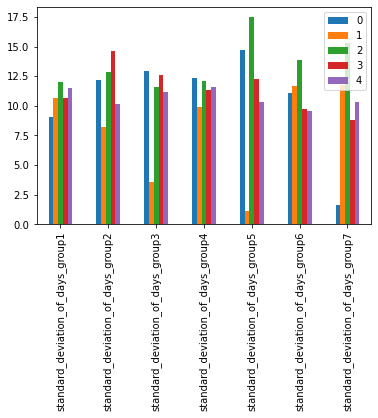

In [89]:
d_data.plot.bar()

In [90]:
h_data = pd.DataFrame.stack(h_data, level=-1, dropna=True)
h_data = pd.DataFrame.unstack(h_data, level=-2, fill_value=None)
h_data

,0,1,2,3,4
standard_deviation_of_hours_group1,4.768492,3.570199,3.951769,4.323116,6.023316
standard_deviation_of_hours_group2,3.659783,5.353931,4.570621,2.581261,4.361015
standard_deviation_of_hours_group3,4.004239,4.250682,4.861522,8.601592,4.601730
standard_deviation_of_hours_group4,5.990239,4.243592,4.622539,4.976549,8.691220
standard_deviation_of_hours_group5,5.549344,1.999375,3.986210,3.490483,6.009818
standard_deviation_of_hours_group6,5.462520,4.001864,5.285376,3.812764,9.323883
standard_deviation_of_hours_group7,3.431948,5.505973,4.379294,8.024609,2.493792


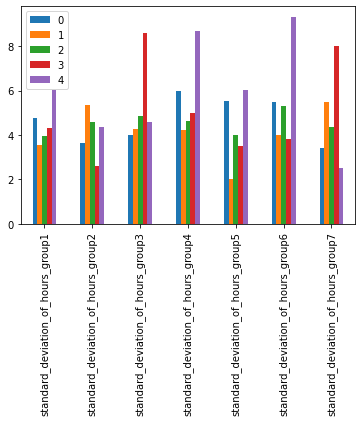

In [122]:
h_data.plot.bar()

No handles with labels found to put in legend.


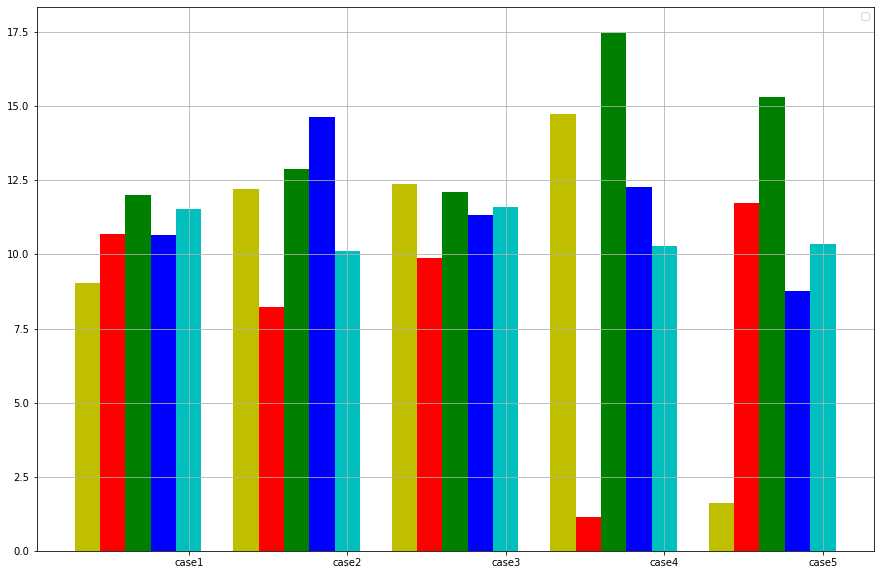

In [9]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
name_list=["case1","case2","case3","case4","case5"]

d1 = d_data.iloc[0].values.tolist()
d2 = d_data.iloc[1].values.tolist()
d3 = d_data.iloc[2].values.tolist()
d4 = d_data.iloc[3].values.tolist()
d5 = d_data.iloc[4].values.tolist()

x =list(range(len(d1)))
total_width, n = 0.8, 5
width = total_width / n

plt.bar(x, d1, width=width,fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
ax.bar(x, d2, width=width,fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
ax.bar(x, d3, width=width,fc = 'g')
for i in range(len(x)):
    x[i] = x[i] + width
ax.bar(x, d4, width=width,fc = 'b')
for i in range(len(x)):
    x[i] = x[i] + width
ax.bar(x, d5, width=width,fc = 'c',tick_label = name_list)
ax.legend()
plt.show()
fig.savefig("image/days_standard_case.png")

No handles with labels found to put in legend.


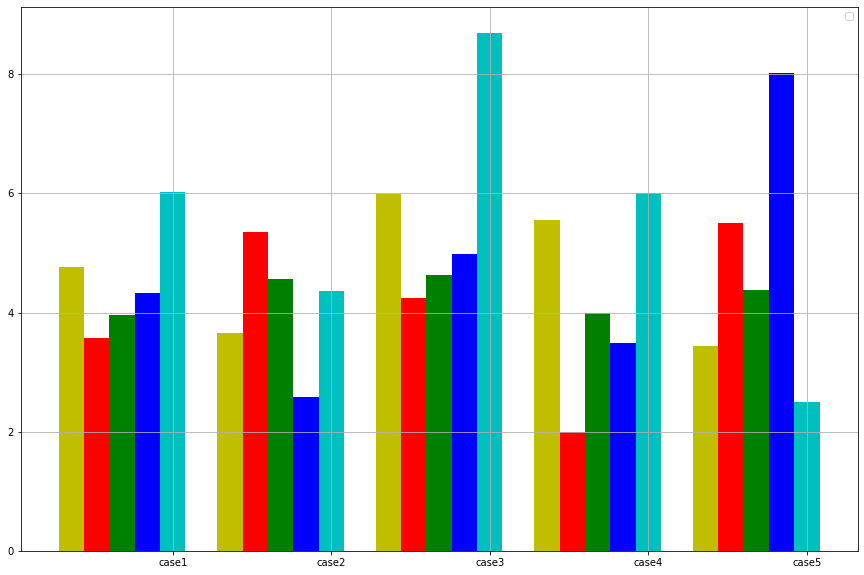

In [10]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
name_list=["case1","case2","case3","case4","case5"]

h1 = h_data.iloc[0].values.tolist()
h2 = h_data.iloc[1].values.tolist()
h3 = h_data.iloc[2].values.tolist()
h4 = h_data.iloc[3].values.tolist()
h5 = h_data.iloc[4].values.tolist()

x =list(range(len(d1)))
total_width, n = 0.8, 5
width = total_width / n

plt.bar(x, h1, width=width,fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
ax.bar(x, h2, width=width,fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
ax.bar(x, h3, width=width,fc = 'g')
for i in range(len(x)):
    x[i] = x[i] + width
ax.bar(x, h4, width=width,fc = 'b')
for i in range(len(x)):
    x[i] = x[i] + width
ax.bar(x, h5, width=width,fc = 'c',tick_label = name_list)
ax.legend()
plt.show()
fig.savefig("image/hours_standard_case.png")